# Current population of Germany by Nationality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Germany, reference date, nationality.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Germans,Foreigners,Total
0,1970-12-31,58263259,2737905,61001164
1,1971-12-31,58314646,3187857,61502503
2,1972-12-31,58255300,3554078,61809378
3,1973-12-31,58110017,3991352,62101369
4,1974-12-31,57940513,4050962,61991475


In [5]:
df.tail()

,ReferenceDate,Germans,Foreigners,Total
46,2016-12-31,73301664,9219989,82521653
47,2017-12-31,73113483,9678868,82792351
48,2018-12-31,72929921,10089292,83019213
49,2019-12-31,72768689,10398022,83166711
50,2020-12-31,72569978,10585053,83155031


In [6]:
df.shape                  

(51, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  51 non-null     object
 1   Germans        51 non-null     int64 
 2   Foreigners     51 non-null     int64 
 3   Total          51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
df['ReferenceDate'] = pd.to_datetime(df['ReferenceDate'])                      # convert ReferenceDate series to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ReferenceDate  51 non-null     datetime64[ns]
 1   Germans        51 non-null     int64         
 2   Foreigners     51 non-null     int64         
 3   Total          51 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 KB


# Data Transformation

In [9]:
df['GermansPctChg'] = df['Germans'].pct_change()                                # percentage change of germans
df['ForeignersPctChg'] = df['Foreigners'].pct_change()                          # percentage change of foreigners
df['GermansPct'] = np.divide(df['Germans'], df['Total'])                        # percentage of germans
df['ForeignersPct'] = np.divide(df['Foreigners'], df['Total'])                  # percentage of foreigners

df.head()

,ReferenceDate,Germans,Foreigners,Total,GermansPctChg,ForeignersPctChg,GermansPct,ForeignersPct
0,1970-12-31,58263259,2737905,61001164,NaN,NaN,0.955117,0.044883
1,1971-12-31,58314646,3187857,61502503,0.000882,0.164342,0.948167,0.051833
2,1972-12-31,58255300,3554078,61809378,-0.001018,0.114880,0.942499,0.057501
3,1973-12-31,58110017,3991352,62101369,-0.002494,0.123034,0.935728,0.064272
4,1974-12-31,57940513,4050962,61991475,-0.002917,0.014935,0.934653,0.065347


# Data Visualization

In [10]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(millions)

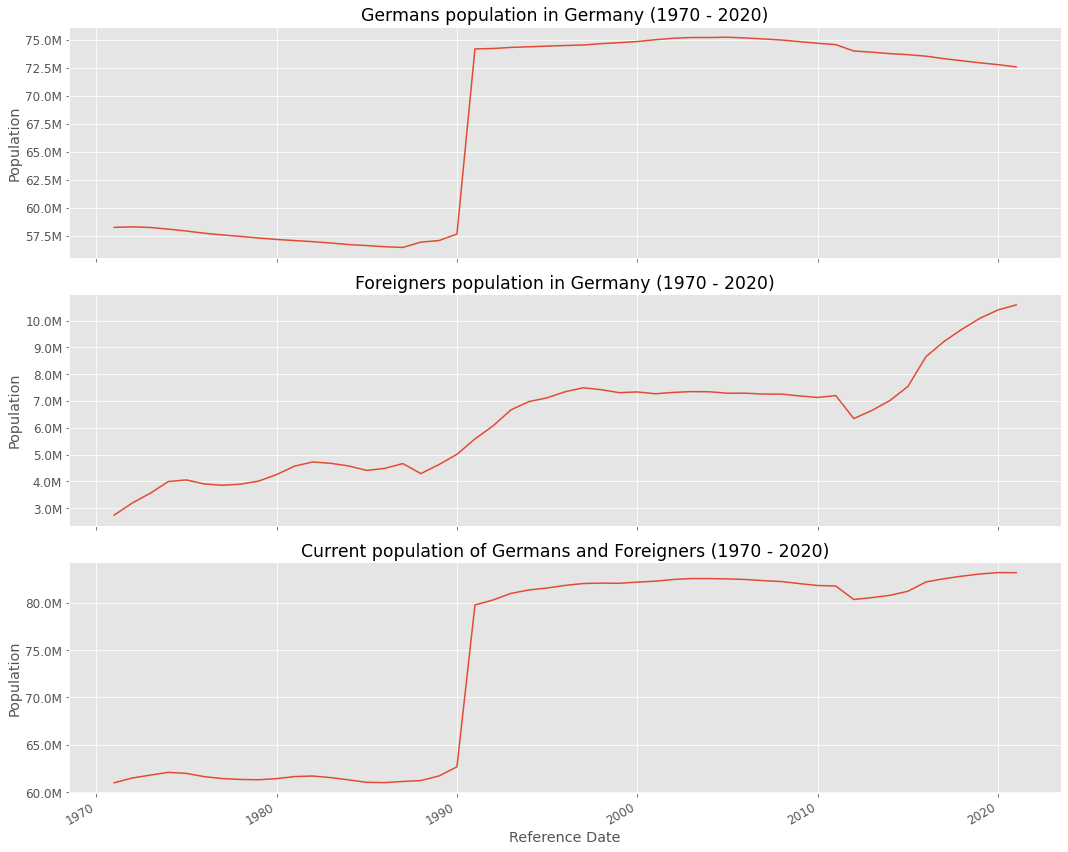

In [11]:
# create figure and axis
fig, axs = plt.subplots(3, 1, sharex=True)
fig.autofmt_xdate()

# plot germans population
sns.lineplot(x='ReferenceDate', y='Germans', data=df, ax=axs[0])
axs[0].set(title='Germans population in Germany (1970 - 2020)', xlabel='Reference Date', ylabel='Population')

# plot foreigners population
sns.lineplot(x='ReferenceDate', y='Foreigners', data=df, ax=axs[1])
axs[1].set(title='Foreigners population in Germany (1970 - 2020)', xlabel='Reference Date', ylabel='Population')

# plot total population
sns.lineplot(x='ReferenceDate', y='Total', data=df, ax=axs[2])
axs[2].set(title='Current population of Germans and Foreigners (1970 - 2020)', xlabel='Reference Date', ylabel='Population')

# set y-axis major formatter
for ax in axs:
    ax.yaxis.set_major_formatter(format_mill)

[Text(0.5, 1.0, 'Overall Percentage of Foreigners')]

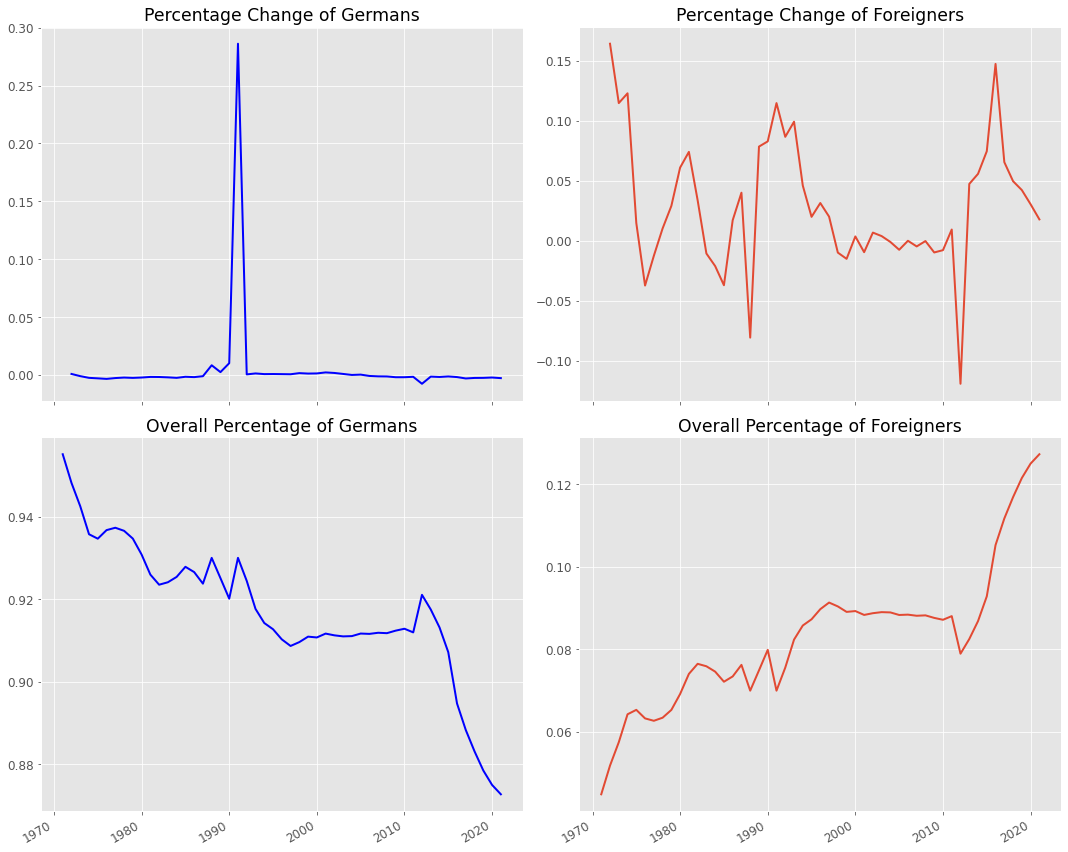

In [12]:
# create figure and axis
fig1, axs = plt.subplots(2, 2, sharex=True)
fig1.autofmt_xdate()

# plot line
axs[0, 0].plot(df['ReferenceDate'], df['GermansPctChg'], linewidth=2, color='blue')
axs[0, 0].set(title='Percentage Change of Germans')

axs[0, 1].plot(df['ReferenceDate'], df['ForeignersPctChg'], linewidth=2)
axs[0, 1].set(title='Percentage Change of Foreigners')

axs[1, 0].plot(df['ReferenceDate'], df['GermansPct'], linewidth=2, color='blue')
axs[1, 0].set(title='Overall Percentage of Germans')

axs[1, 1].plot(df['ReferenceDate'], df['ForeignersPct'], linewidth=2)
axs[1, 1].set(title='Overall Percentage of Foreigners')